In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sign_mnist_train.csv')

In [ ]:
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [ ]:
data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
data['label'].unique()

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
X=data.drop('label',axis=1)
y=data['label']
X=X.astype('float32')
X=X/255
y=to_categorical(y,num_classes=26)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train=X_train.values.reshape(-1,28,28,1)
X_test=X_test.values.reshape(-1,28,28,1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21964, 28, 28, 1)
(5491, 28, 28, 1)
(21964, 26)
(5491, 26)


Pooling reduces the size of intermediate features, we have used max pooling with a matrix of size 2x2, that is it out of every 2x2 box, it will select the maximum value. This helps in the reducing the number of convulational layers thus, reducing the model complexity.

2 Covulational layers have been added, one with 32 filters and the other with 64. The number of filters have been increased in order to capture the complex features present in the image and generate a more accurate output

Flattening has been done in order to reduce the dimensionality of the original vector into a 1D vector which can then be passed on to the Dense layer for classification. The dense layer needs to classify each image into one of the 26 alphabets

Optimizer that is used is Adam and the loss function used is categorical crossentropy.

Along with the direction, adam also takes care of the learning rate coefficient that is it adjusts the learning rate according to the value of gradients, thus leading to a smoother convergence.

Since this is a multi-class classification problem, we have used categorical cross entropy. It measure the dfference between true and predicted labels and penalizes the invalid or wrong judgements heavily. And gives higgh weightage to the correct judgement.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Activation


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.28))
model.add(Dense(26, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,201,946 (4.59 MB)

 Trainable params: 1,201,946 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4386 - loss: 1.9276 - val_accuracy: 0.9884 - val_loss: 0.0780
Epoch 2/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9628 - loss: 0.1299 - val_accuracy: 0.9998 - val_loss: 0.0087
Epoch 3/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9881 - loss: 0.0454 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 4/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9893 - loss: 0.0335 - val_accuracy: 1.0000 - val_loss: 7.2679e-04
Epoch 5/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9912 - loss: 0.0257 - val_accuracy: 0.9984 - val_loss: 0.0039
Epoch 6/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9928 - loss: 0.0242 - val_accuracy: 0.9998 - val_loss: 0.0015
Epoch 7/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9946 - loss: 0.0197 - val_accuracy: 0.9986 - val_loss: 0.0047
Epoch 8/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9951 - loss: 0.0151 - val_accuracy

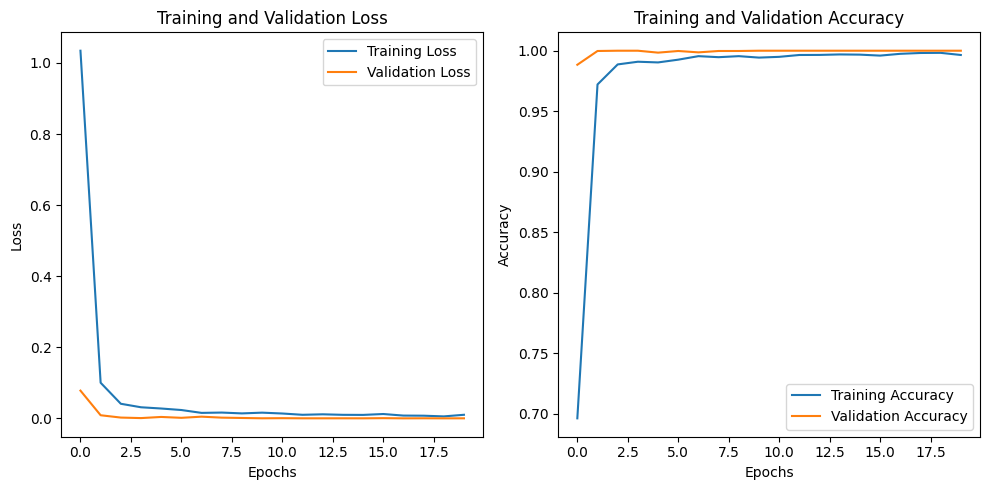

In [ ]:
import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.tight_layout()
plt.show()


In [ ]:
model.evaluate(X_test,y_test,return_dict=True)


172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.0917e-04


{'accuracy': 1.0, 'loss': 7.854194700485095e-05}

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Activation


model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPool2D(pool_size=(3, 3)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.28))
model2.add(Dropout(0.4))
model2.add(Dense(26, activation='softmax'))
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



Epoch 1/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.3093 - loss: 2.3173 - val_accuracy: 0.9527 - val_loss: 0.2571
Epoch 2/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8090 - loss: 0.5661 - val_accuracy: 0.9913 - val_loss: 0.0564
Epoch 3/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8769 - loss: 0.3394 - val_accuracy: 0.9970 - val_loss: 0.0230
Epoch 4/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9123 - loss: 0.2369 - val_accuracy: 0.9968 - val_loss: 0.0103
Epoch 5/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9282 - loss: 0.1909 - val_accuracy: 0.9982 - val_loss: 0.0063
Epoch 6/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9399 - loss: 0.1695 - val_accuracy: 0.9986 - val_loss: 0.0048
Epoch 7/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9467 - loss: 0.1380 - val_accuracy: 0.9998 - val_loss: 0.0018
Epoch 8/20
550/550 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9492 - loss: 0.1404 - val_accuracy: 0.

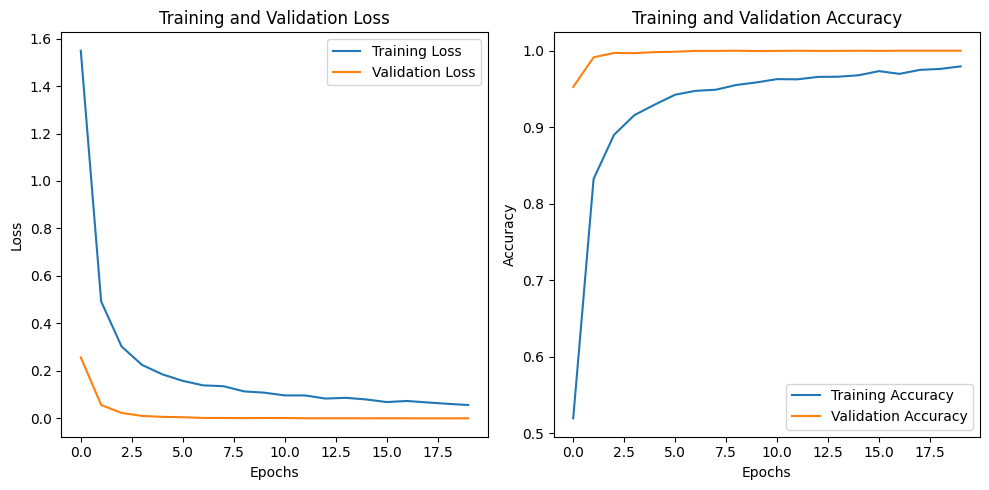

In [ ]:
import matplotlib.pyplot as plt

# Train the model and store the history
history = model2.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.tight_layout()
plt.show()


In [ ]:
model2.evaluate(X_test,y_test,return_dict=True)


172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 1.3959e-04


{'accuracy': 1.0, 'loss': 0.00013907770335208625}



*   In model 2 we have made 2 changes , the first is we have increased the pool size from 2 X 2 to 3 X 3 this might lead to model overlooking some important features and so is evident from the accuracy of model1 and model2
*  also we have added an additional dropout layer with dropout rate=0.4 other than 0.28 one , this has further contributed to the training accuracy being reduced

*  in the model2 the accuracy is slowly getting close to 1 rather than the model previously hence this seems to generalise the data better , hence dropout helps reduce overfitting




**Shared structure property** : convolutional layers apply the same set of filters across the entire image, enabling the network to detect features like edges, textures, and patterns regardless of their position. This approach significantly reduces the number of parameters and ensures that feature detection is consistent across different regions of the image.

 **Invariance property** :handled through convolution and max-pooling layers. Convolution ensures that the network learns translation-invariant features by scanning the image with filters, while max-pooling layers downsample the feature maps, retaining the most important information and making the network robust to small shifts and distortions and thus ensures that the detection of a feature (like an edge) is not affected by its exact location in the image.

**PART B**

In [ ]:
df = pd.read_csv('household_power_consumption.txt', sep=';',
                 parse_dates={'Date_Time' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='Date_Time')

df.head()

<ipython-input-2-547e70182d96>:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.txt', sep=';',
<ipython-input-2-547e70182d96>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.txt', sep=';',
<ipython-input-2-547e70182d96>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('household_power_consumption.txt', sep=';',


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
df.shape

(2075259, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
df.isnull().sum()


,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


Putting mean in place of null values

In [ ]:
for j in range(0,7):
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
df.isnull().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


In [ ]:
df.shape

(2075259, 7)

<ipython-input-9-0b76e0dfe34d>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.Global_active_power.resample('M').mean().plot(kind='hist', color='y', legend=True )
<ipython-input-9-0b76e0dfe34d>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.Global_reactive_power.resample('M').mean().plot(kind='hist',color='g', legend=True)
<ipython-input-9-0b76e0dfe34d>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.Global_intensity.resample('M').mean().plot(kind='hist', color='b', legend=True)
<ipython-input-9-0b76e0dfe34d>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='r', legend=True)
<ipython-input-9-0b76e0dfe34d>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME

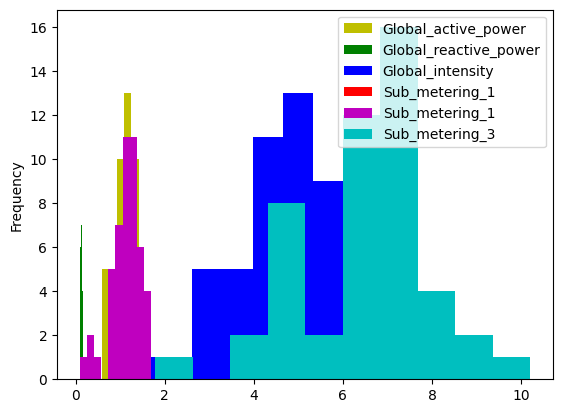

In [ ]:
import matplotlib.pyplot as plt

df.Global_active_power.resample('M').mean().plot(kind='hist', color='y', legend=True )
df.Global_reactive_power.resample('M').mean().plot(kind='hist',color='g', legend=True)
df.Global_intensity.resample('M').mean().plot(kind='hist', color='b', legend=True)
df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='r', legend=True)
df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='m', legend=True)
df.Sub_metering_3.resample('M').mean().plot(kind='hist', color='c', legend=True)
plt.show()

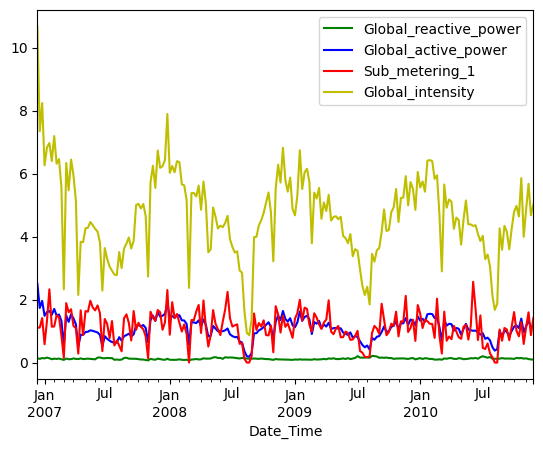

In [ ]:
df.Global_reactive_power.resample('W').mean().plot(color='g', legend=True)
df.Global_active_power.resample('W').mean().plot(color='b', legend=True)
df.Sub_metering_1.resample('W').mean().plot(color='r', legend=True)
df.Global_intensity.resample('W').mean().plot(color='y', legend=True)
plt.show()

In [ ]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

We are only using power values, hence we drop voltage


In [ ]:
df.drop('Voltage', axis=1, inplace=True)

Model requires fixed input-output pairs but raw time series data is sequential and lacks this structure. This function transforms sequential data into tabular form suitable for models and allows the model to learn from historical patterns to make predictions.


Here names is the list the list of columns in the data and cols is a list to store the shifted version of the data. We loop over the input freatures from n_in to 1, and the data x steps backward to create lagged features.

For the output layer, the data from 1 to n_out-1 has been taken and shifted x steps forward in order to create forecast data.

Towards the end, we have dropped all rows with Nan values.

In [ ]:
def data_prep(data, n_in=1, n_out=1, dropnan=True):
    names, cols = list(), list()
    data_frame = pd.DataFrame(data)
    n = 1 if type(data) is list else data.shape[1]

    for x in range(n_in, 0, -1):  #Input
        cols.append(data_frame.shift(x))
        names += [('var%d(t-%d)' % (y+1, x)) for y in range(n)]

    for x in range(0, n_out):  #Output
        cols.append(data_frame.shift(-x))
        if x == 0:
            names += [('var%d(t)' % (y+1)) for y in range(n)]
        else:
            names += [('var%d(t+%d)' % (y+1, x)) for y in range(n)]

    z = pd.concat(cols, axis=1)
    z.columns = names

    if dropnan:
        z.dropna(inplace=True)
    return z

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,
2006-12-16 17:24:00,4.216,0.418,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,15.8,0.0,1.0,17.0


Time series data in minutes will be too large to handle. Thereby we change it
to daily data (as instructed in the assignment) in order to make the dataset smaller while also retaining the major trends in the data

In [ ]:
data_scaled = df.resample('d').mean()
data_scaled.head()

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,
2006-12-16,3.053475,0.088187,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,6.467361,0.000000,1.838889,9.765972


In [ ]:
data_scaled.shape

(1442, 6)

In [ ]:
results = data_scaled.values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
results = scaler.fit_transform(results)
results.shape

(1442, 6)

we have kept n_in and n_out to be 1. We aim to predict the energy consumption for the next day based on short term dependencies.

In [ ]:
r = data_prep(results, 1, 1)
r.drop(r.columns[[7,8,9,10,11]], axis=1, inplace=True)
r.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t)
1,0.916786,0.130732,0.928499,0.000000,0.163965,0.740357,0.694252
2,0.694252,0.426671,0.695226,0.181857,0.345776,0.536762,0.431901
3,0.431901,0.234750,0.424618,0.095088,0.216451,0.566912,0.313037
4,0.313037,0.202322,0.311508,0.075051,0.627798,0.218615,0.436748
5,0.436748,0.232377,0.428075,0.000000,0.218680,0.568916,0.324670


In [ ]:
results.shape

(1442, 6)

Now we will split the data into testing and training data.

Here, we will be using 800 days of data as the train data and the rest of the 641 days as the test data.

In [ ]:
results = r.values

In [ ]:
duration = 800  #duration of a year (no of hours in a day)*(no of days)
train = results[:duration, :]
test = results[duration:, :]

In [ ]:
print('Train shape: %s, Test shape: %s' % (train.shape, test.shape))

Train shape: (800, 7), Test shape: (641, 7)


In [ ]:
X_train, y_train = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

In [ ]:
print ('X_train Shape : ',X_train.shape)
print ('y_train Shape : ',y_train.shape)
print ('X_test Shape : ',X_test.shape)
print ('y_test Shape : ',y_test.shape)

X_train Shape :  (800, 6)
y_train Shape :  (800,)
X_test Shape :  (641, 6)
y_test Shape :  (641,)


In order to use the data in a LSTM model, we will have to reshape it ([samples, timesteps, features])

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  #  Reshaping Input To Be 3D [samples, timesteps, features]
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(800, 1, 6) (800,) (641, 1, 6) (641,)


LSTM Model

In this model:

1. LSTM Layer -> X_train.shape[1] describes the number of previous days data that is to be used for prediction. X_train_shape[2] describes the number of features leveraged. Return sequqnces has been set to true as it needs to output all subsequqences since these need to be passed on to another LSTM layer.
2. Dropout layer -> Essential to reduce overfitting. the first layer randomly turns off 20% neurons and the second turns off 30% neurons preventing the model from relying heavily over specific neurons.
3. Dense Layer -> This is the final layer in the lSTM that passes on the output. The return sequences has been set false since this is the final layer in the model.

The loss function used is mean sqaured error and the optimizer used is adam.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(LSTM(200, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(200, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss='mean_squared_error', optimizer = 'adam')


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 200)              │         165,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 200)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 486,601 (1.86 MB)

 Trainable params: 486,601 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_model = model.fit(X_train, y_train, epochs = 100, batch_size = 70, validation_data = (X_test, y_test), verbose = 2, shuffle = False)


Epoch 1/100
12/12 - 7s - 575ms/step - loss: 0.0784 - val_loss: 0.0183
Epoch 2/100
12/12 - 0s - 10ms/step - loss: 0.0229 - val_loss: 0.0197
Epoch 3/100
12/12 - 0s - 11ms/step - loss: 0.0192 - val_loss: 0.0085
Epoch 4/100
12/12 - 0s - 9ms/step - loss: 0.0167 - val_loss: 0.0083
Epoch 5/100
12/12 - 0s - 9ms/step - loss: 0.0161 - val_loss: 0.0094
Epoch 6/100
12/12 - 0s - 11ms/step - loss: 0.0158 - val_loss: 0.0079
Epoch 7/100
12/12 - 0s - 9ms/step - loss: 0.0150 - val_loss: 0.0081
Epoch 8/100
12/12 - 0s - 10ms/step - loss: 0.0149 - val_loss: 0.0077
Epoch 9/100
12/12 - 0s - 10ms/step - loss: 0.0150 - val_loss: 0.0073
Epoch 10/100
12/12 - 0s - 9ms/step - loss: 0.0144 - val_loss: 0.0073
Epoch 11/100
12/12 - 0s - 9ms/step - loss: 0.0144 - val_loss: 0.0071
Epoch 12/100
12/12 - 0s - 9ms/step - loss: 0.0143 - val_loss: 0.0069
Epoch 13/100
12/12 - 0s - 9ms/step - loss: 0.0140 - val_loss: 0.0068
Epoch 14/100
12/12 - 0s - 9ms/step - loss: 0.0138 - val_loss: 0.0067
Epoch 15/100
12/12 - 0s - 12ms/step 

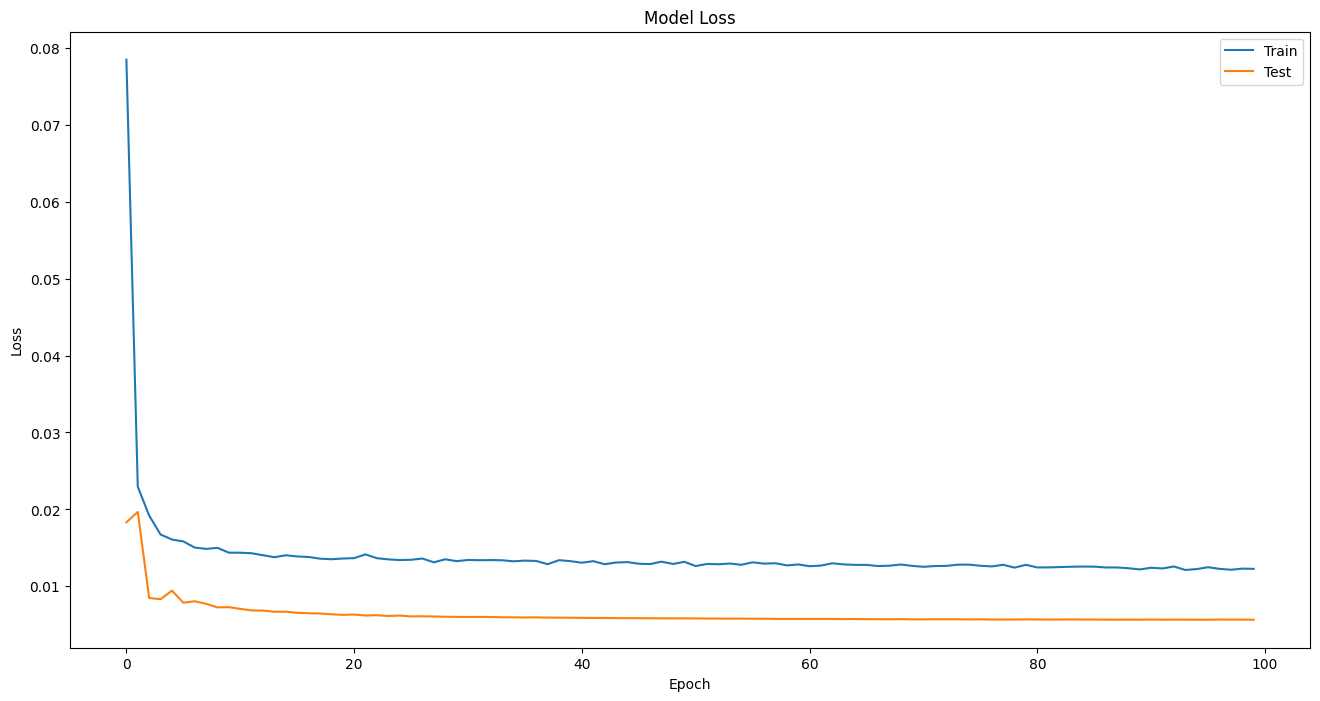

In [ ]:
plt.figure(figsize = (16, 8))
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [ ]:
import numpy as np
y_pred_i = np.concatenate((y_pred, X_test[:, -5:]), axis=1)
y_pred_i = scaler.inverse_transform(y_pred_i)
y_pred_i = y_pred_i[:,0]

In [ ]:
y_test = y_test.reshape((len(y_test), 1))
y_i = np.concatenate((y_test, X_test[:, -5:]), axis=1)
y_i = scaler.inverse_transform(y_i)
y_i = y_i[:,0]

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

# RMSE
rmse = np.sqrt(mean_squared_error(y_i, y_pred_i))
print('Test RMSE: %.3f' % rmse)

# MAE
mae = mean_absolute_error(y_i, y_pred_i)
print('Test MAE: %.3f' % mae)

# MAPE
mape = np.mean(np.abs((y_i - y_pred_i) / np.maximum(y_i, 1e-10))) * 100
print('Test MAPE: %.3f%%' % mape)

# R² Score
r2 = r2_score(y_i, y_pred_i)
print('Test R² Score: %.3f' % r2)

Test RMSE: 0.236
Test MAE: 0.180
Test MAPE: 18.795%
Test R² Score: 0.481


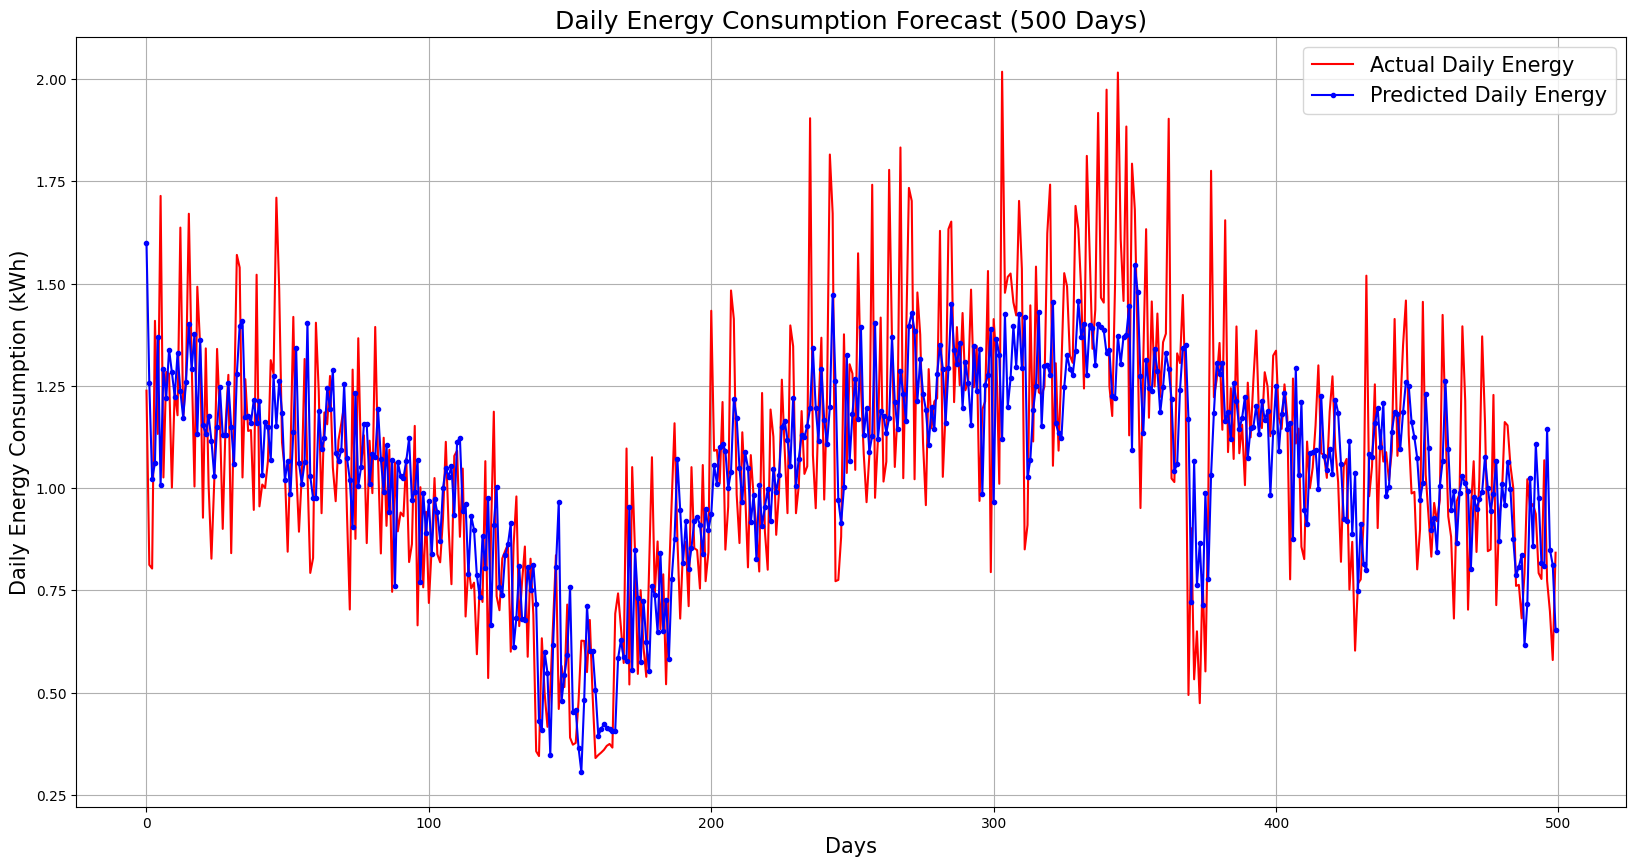

In [ ]:
days_to_plot = 500
x_days = range(days_to_plot)


daily_actual = y_i[:days_to_plot]  # Actual daily energy consumption
daily_predicted = y_pred_i[:days_to_plot]  # Predicted daily energy consumption

# Plot the data
plt.figure(figsize=(20, 10))
plt.plot(x_days, daily_actual, 'r', label="Actual Daily Energy")
plt.plot(x_days, daily_predicted, marker='.', color='b', label="Predicted Daily Energy")
plt.ylabel('Daily Energy Consumption (kWh)', size=15)
plt.xlabel('Days', size=15)
plt.title('Daily Energy Consumption Forecast (500 Days)', size=18)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()
